### Importing libraries

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')


### Problem Statement 2:
You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

Dataset Description:The dataset contains nine features:

I.longitude: A measure of how far west a house is; a higher value is farther west

II.latitude: A measure of how far north a house is; a higher value is farther north

III.housingMedianAge: Median age of a house within a block; a lower number is a newer building

IV.total rooms: Total number of rooms within a block

V.total bedrooms: Total number of bedrooms within a block

VI.population: Total number of people residing within a block

VII.households: Total number of households, a group of people residing within a home unit, for a block

VIII.median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

IX.median house value:Median house value for households within a block (measured in US Dollars)Write a Python code to perform the following tasks mentioned:

1.Load the data, check its shape and check for null values

 2.Split the dataset for training and testing -1000 instances for testing
 
 3.Train the model using sklearn (Apply linear regression to train a model for prediction)
 
 4.Predict the prices on test data and evaluate the modelby r2 score and mean absolute error
 
 5.Find coefficient and intercept using the trained model

In [212]:
data=pd.read_csv("D:\Shivam\study material\CSV\california_housing_train.csv")### path to file
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [214]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Shape of dataset

In [215]:
data.shape# shape of our dataset row -column

(17000, 9)

In [216]:
data.isnull().sum()### contain np null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### data conatin no null values

In [217]:
data.corr()## correlation of our dataset 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [218]:
x=data.drop(['median_house_value'],axis=1)### independent variables
y=data['median_house_value']## Dependent variables

In [219]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.0588,random_state=40)

In [220]:
xtrain.shape

(16000, 8)

In [221]:
xtest.shape

(1000, 8)

In [222]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [223]:
ypred=lr.predict(xtest)

In [224]:
from sklearn.metrics import r2_score,mean_absolute_error

In [225]:
print("R2 score",r2_score(ytest,ypred))
print("Mean absolute error",mean_absolute_error(ytest,ypred))

R2 score 0.6497854963379918
Mean absolute error 48501.745294891276


#### Error can reduce by using optimal features from all feature and scaling the data

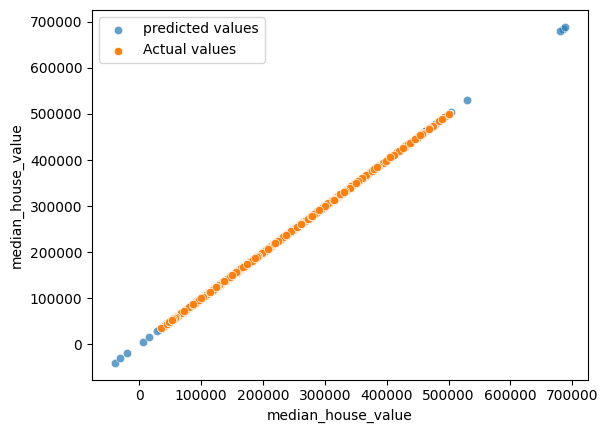

In [226]:
sns.scatterplot(x=ypred,y=ypred,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest,y=ytest,label='Actual values')
mp.legend()
mp.show()


GIT LINK :https://github.com/Shanezatch/Learnerhub/blob/08c7b0cf6fe97b978f70b0736700dc75bb98497e/IPYTHON/Assignment%204.questio%202.ipynb